In [380]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples
import collections


# benchmark = 0
# for clusters in range(2,50):
#     vs_benchmark = 0
#     num_cluster = clusters
#     # this is the data file with $ and , removed as well as the nominal "majors" column removed
#     career_data = pd.read_csv("degrees-that-pay-back_no_unique_nominal.csv")

# # this is the raw data file
#     labels_data = pd.read_csv("degrees-that-pay-back.csv")

#     """ This is a sklearn implementation """
# #if need to scale use min_max_scaler from sklearn
#     scaler = MinMaxScaler()
#     scaled_data = scaler.fit_transform(career_data)

# # do fit values
# # for i in range(1,300):
# #     kmeans = KMeans(n_clusters=num_cluster,max_iter=i,random_state=0).fit(scaled_data)
# #     if str(kmeans.inertia_)[:5] == '1.635':
# #         print i
# #         break
    
#     kmeans = KMeans(n_clusters=num_cluster,max_iter=300,random_state=0).fit(scaled_data)
#     clusternum = kmeans.labels_

# # get labels (majors)
#     majors = labels_data["Undergraduate Major"]

# # associate labels with cluster number
#     major_to_cluster = {}
#     cluster_to_major = {}
# # k-means SSE
# #     print kmeans.inertia_
# #initialize with empty lists
#     for i in range(num_cluster):
#         cluster_to_major[i] = []
    
#     for i in range(len(kmeans.labels_)):
#         major_to_cluster[majors[i]] = clusternum[i]

#     for i in cluster_to_major.keys():
#         for j in major_to_cluster.keys():
#             if major_to_cluster[j] == i:
#                 cluster_to_major[i].append(j)
    
# # Silhouette Coefficient    
#     SS_value = [silhouette_samples(scaled_data,clusternum),clusternum]
#     SS_value = pd.DataFrame(SS_value)
#     SS_value = np.array(SS_value.T.sort_values(by=[1], ascending=[True]).drop([1],1))
#     cluster_num = [0]*len(collections.Counter(clusternum))
#     for i in range(len(cluster_num)):
#         cluster_num[i] = collections.Counter(clusternum)[i]
#     cluster_cum = np.cumsum(cluster_num)
#     ran = len(cluster_cum)
#     for i in range(ran):
#         if i == 0:
#             vs_benchmark += np.mean(SS_value[0:cluster_cum[i]])
#         else:
#             vs_benchmark += np.mean(SS_value[cluster_cum[i-1]:cluster_cum[i]])
#     if vs_benchmark > benchmark:
#         benchmark = vs_benchmark
#         print clusters
#         print benchmark
    
Silhouette_list = []
num_cluster = 5
Silhouette_Coefficient = 0
# this is the data file with $ and , removed as well as the nominal "majors" column removed
career_data = pd.read_csv("degrees-that-pay-back_no_unique_nominal.csv")

# this is the raw data file
labels_data = pd.read_csv("degrees-that-pay-back.csv")

""" This is a sklearn implementation """
#if need to scale use min_max_scaler from sklearn
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(career_data)

# do fit values
# for i in range(1,300):
#     kmeans = KMeans(n_clusters=num_cluster,max_iter=i,random_state=0).fit(scaled_data)
#     if str(kmeans.inertia_)[:5] == '1.635':
#         print i
#         break
    
kmeans = AgglomerativeClustering(linkage='ward', connectivity=None
                                    , n_clusters=5).fit(scaled_data)
clusternum = kmeans.labels_

# get labels (majors)
majors = labels_data["Undergraduate Major"]

# associate labels with cluster number
major_to_cluster = {}
cluster_to_major = {}
# k-means SSE

#initialize with empty lists
for i in range(num_cluster):
    cluster_to_major[i] = []
    
for i in range(len(kmeans.labels_)):
    major_to_cluster[majors[i]] = clusternum[i]

for i in cluster_to_major.keys():
    for j in major_to_cluster.keys():
        if major_to_cluster[j] == i:
            cluster_to_major[i].append(j)

for key in cluster_to_major:
    print "%s (%.2f): %s"%(key, float(len(cluster_to_major[key]))/50, cluster_to_major[key])
    
# Silhouette Coefficient    
SS_value = [silhouette_samples(scaled_data,clusternum),clusternum]
SS_value = pd.DataFrame(SS_value)
SS_value = np.array(SS_value.T.sort_values(by=[1], ascending=[True]).drop([1],1))
cluster_num = [0]*len(collections.Counter(clusternum))
for i in range(len(cluster_num)):
    cluster_num[i] = collections.Counter(clusternum)[i]
cluster_cum = np.cumsum(cluster_num)
ran = len(cluster_cum)
for i in range(ran):
    if i == 0:
        print("Average Silhouette Coefficient for cluster %.6s is %.6s." % (i,np.mean(SS_value[0:cluster_cum[i]])))
        Silhouette_list+= np.mean(SS_value[0:cluster_cum[i]])
    else:
        print("Average Silhouette Coefficient for cluster %.6s is %.6s." % (i,np.mean(SS_value[cluster_cum[i-1]:cluster_cum[i]])))
        Silhouette_list+= np.mean(SS_value[cluster_cum[i-1]:cluster_cum[i]])
print Silhouette_list


0 (0.32): ['Political Science', 'Geology', 'Marketing', 'Philosophy', 'Management Information Systems (MIS)', 'International Relations', 'Journalism', 'Communications', 'Accounting', 'Chemistry', 'History', 'Information Technology (IT)', 'Business Management', 'Agriculture', 'Film', 'Architecture']
1 (0.04): ['Physician Assistant', 'Nursing']
2 (0.38): ['Sociology', 'Psychology', 'English', 'Forestry', 'Religion', 'Music', 'Hospitality & Tourism', 'Nutrition', 'Biology', 'Interior Design', 'Anthropology', 'Health Care Administration', 'Drama', 'Art History', 'Graphic Design', 'Geography', 'Criminal Justice', 'Spanish', 'Education']
3 (0.18): ['Mechanical Engineering', 'Construction', 'Computer Science', 'Aerospace Engineering', 'Chemical Engineering', 'Industrial Engineering', 'Civil Engineering', 'Computer Engineering', 'Electrical Engineering']
4 (0.08): ['Math', 'Finance', 'Economics', 'Physics']
Average Silhouette Coefficient for cluster 0 is 0.3385.
Average Silhouette Coefficient 

In [121]:
import csv
with open('plot.csv', "wb") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
#         for key in cluster_to_major:
#             for major in cluster_to_major[key]:
#                 writer.writerow([major])
        for num in Silhouette_list:
            for k in num:
                writer.writerow(k)

In [171]:
from sklearn import cluster
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
import collections
import datetime
import time

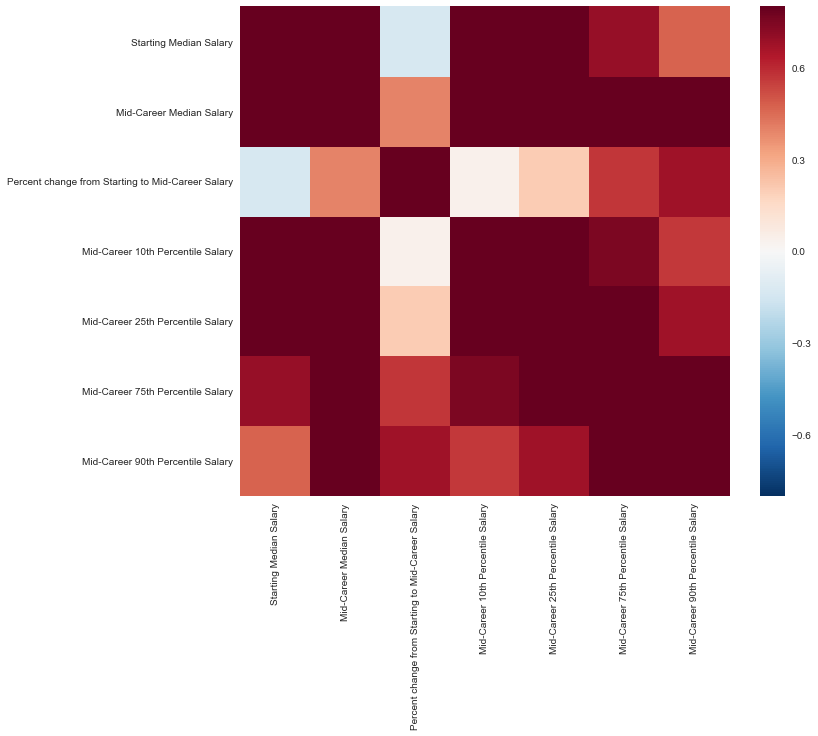

In [172]:
sns.set(style="white")

# Load the datset of correlations between cortical brain networks
df = pd.read_csv('Copy of degrees-that-pay-back-normalized.csv')
corrmat = df.corr()
# print(corrmat)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap using seaborn
# sns.color_palette("RdGy", 10)
# sns.palplot(sns.color_palette("RdGy", 10))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [327]:
num_cluster = 5
Silhouette_Coefficient = 0
# this is the data file with $ and , removed as well as the nominal "majors" column removed
df = pd.read_csv("Copy of degrees-that-pay-back-normalized.csv")
df_1 = pd.DataFrame(df, columns=['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary'])



hier = cluster.AgglomerativeClustering(n_clusters=5, linkage="ward").fit(df_1)
clusternum = hier.labels_



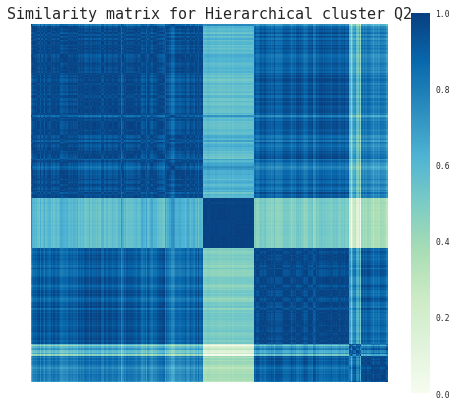

In [374]:
num_cluster = 5
# this is the data file with $ and , removed as well as the nominal "majors" column removed
df = pd.read_csv("salaries-by-college-type.csv")
df_1 = pd.DataFrame(df, columns=['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary'])

# this is where DBscan functions are different from others
hier = cluster.AgglomerativeClustering(n_clusters=5, linkage="ward").fit(df_1)
clusternum = hier.labels_


pca = PCA(n_components=1)
df_1_pca = np.ravel(pca.fit_transform(df_1))
DDD = [df_1_pca,clusternum]
df_1_db = pd.DataFrame(DDD)
df_1_db = np.array(df_1_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
df_1_distance = pairwise_distances(df_1_db, metric='euclidean')
d_1_max = np.amax(df_1_distance)
d_1_min = np.amin(df_1_distance)
df_1_similarity = np.zeros([269,269]) #instances number
for i in range(len(df_1_distance)):
    for j in range(len(df_1_distance)):
        df_1_similarity[i,j] = 1-(df_1_distance[i,j]-d_1_min)/(d_1_max-d_1_min)

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8,7))
cmap = sns.diverging_palette(220, 8, as_cmap=True)
sns.heatmap(df_1_similarity,cmap='GnBu',vmax=1, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for Hierarchical cluster Q2',fontsize=15) #title
plt.show()

In [357]:
pca = PCA(n_components=1)
df_1_pca = np.ravel(pca.fit_transform(df_1))
DDD = [df_1_pca.T,clusternum]
df_1_db = pd.DataFrame(DDD)
df_1_db = np.array(df_1_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
df_1_distance = pairwise_distances(df_1_db, metric='euclidean')
d_1_max = np.amax(df_1_distance)
d_1_min = np.amin(df_1_distance)
df_1_similarity = np.zeros([50,50])
for i in range(len(df_1_distance)):
    for j in range(len(df_1_distance)):
        df_1_similarity[i,j] = 1-(df_1_distance[i,j]-d_1_min)/(d_1_max-d_1_min)

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8,7))
cmap = sns.diverging_palette(220, 8, as_cmap=True)
sns.heatmap(df_1_similarity, cmap='GnRed',vmax=1, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for Hierarchical cluster Q1',fontsize=15)
plt.show()
plt.savefig('k1.jpg')


IndexError: index 50 is out of bounds for axis 1 with size 50

In [314]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import silhouette_samples
from sklearn import cluster
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance
import collections
import datetime
import time
from collections import Counter

In [369]:
df = pd.read_csv('salaries-by-region.csv')
df_1 = pd.DataFrame(df, columns=['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary'])
                               
start_time = time.time()
h_1 = cluster.AgglomerativeClustering(n_clusters=5, linkage="ward").fit(df_1)
print(h_1.labels_)
group = [[],[],[],[],[]]
index = 0
for num in h_1.labels_:
    group[num].append(pd.DataFrame(df, columns=['School Name']).iloc[index][0])
    index += 1
purity = 0
for g in group:
    counts = Counter(g)
    print counts
    purity += counts.most_common()[0][1]
print float(float(purity)/320)

# cluster_percentage = [0]*5
# print()
# print('Percentage of clusters')
# for i in range(5):
#     print float((float(collections.Counter(h_1.labels_)[i]*100)/320))
    
# load_time_h_1 = time.time() - start_time
# load_time_h_1

[3 4 4 1 4 2 1 2 4 1 1 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 1 2 2 2 2 2 2 2 2
 2 2 2 2 0 0 0 4 2 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 4 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 4 4 1 4
 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 0 0 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3
 1 3 3 3 4 4 4 1 4 1 1 1 1 1 4 1 4 4 4 1 4 1 4 1 1 1 2 4 1 1 1 2 2 2 2 2 2
 2 2 4 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 0 0
 0 2 2 2 2 0 2 0 0 2 0 0 4 0 0 0 0 0 0 2 0 2 0 0]
Counter({'University of Southern Maine': 1, 'Eastern Michigan University': 1, 'University of Wisconsin (UW) - Green Bay': 1, 'Gustavus Adolphus College': 1, 'University of Central Florida (UCF)': 1, 'Missouri State University (MSU)': 1, 'Western Carolina University': 1, 'Jacksonville University': 1, 'Illinois State University': 1, 'Florida Internat

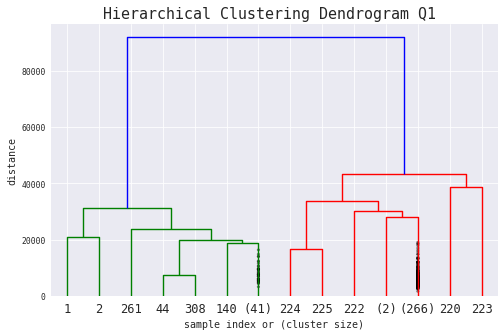

In [297]:
fig = plt.figure(figsize=(8,5))
Y = distance.pdist(df_1)
Z = hierarchy.linkage(Y, method = "single", metric = "euclidean")

T = hierarchy.fcluster(Z, 5, criterion = "distance",depth=5)
plt.title('Hierarchical Clustering Dendrogram Q1 ',fontsize=15)
plt.xlabel('sample index or (cluster size)',fontsize=10)
plt.ylabel('distance',fontsize=10)
hierarchy.dendrogram(Z,4,truncate_mode='level',orientation='top',show_contracted=True)
plt.show()
plt.savefig('h1.jpg')

In [368]:
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

num_cluster = 5
link = "complete"

# read data
# this file has the nominal columns removed and punctuation removed from the numbers
career_data = pd.read_csv("salaries-by-region-noname.csv")
# this is the raw data file
labels_data = pd.read_csv("salaries-by-region.csv")

# scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(career_data)

labels = labels_data["Region"]

""" This is the sklearn implementation """

# Create model
max_model = AgglomerativeClustering(linkage=link, connectivity=None
                                    , n_clusters=num_cluster).fit(scaled_data)
clusternum = max_model.labels_ # from this can get cluster to instance mapping

# initialize clusters with empty lists
clusters = {}
for i in range(num_cluster):
    clusters[i] = []

for i in range(len(clusternum)):
    clusters[clusternum[i]].append(labels[i])
    
# purity calculation
purity = {}
numdata = 0
for i in clusters.keys():
    label_sums = {}
    for j in clusters[i]:
        if j in label_sums.keys():
            label_sums[j] += 1
        else:
            label_sums[j] = 1
    purity[i] = max(label_sums.values())
    numdata += sum(label_sums.values())

majorities = sum(purity.values())
p = majorities / float(numdata)
print link + " purity: " + str(p)

# calculate internal silhouette metric
silscore = silhouette_score(scaled_data, clusternum)
print "silhouette score: " + str(silscore)
print(normalized_mutual_info_score(labels,clusternum))

complete purity: 0.384375
silhouette score: 0.341906949149
0.0781236049826
